In [3]:
# Linear Regression - Example (Introduction)

# Prof. Dr. Dirk Reichardt - DHBW

# Import (ant stuff to include)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import math
import random

# Read Sample Data 

print(os.getcwd() )

data = pd.read_csv('bmi_100.csv', sep=";")

print(data)


C:\Users\UAI5FE\OneDrive - Bosch Group\00_DHBW\git\T3M40507_Maschinelles_Lernen_und_Computational Intelligence
    Groesse  Gewicht
0       176       78
1       171       80
2       161       85
3       170       64
4       148       59
..      ...      ...
95      184      100
96      158       58
97      179       89
98      202      114
99      193       96

[100 rows x 2 columns]


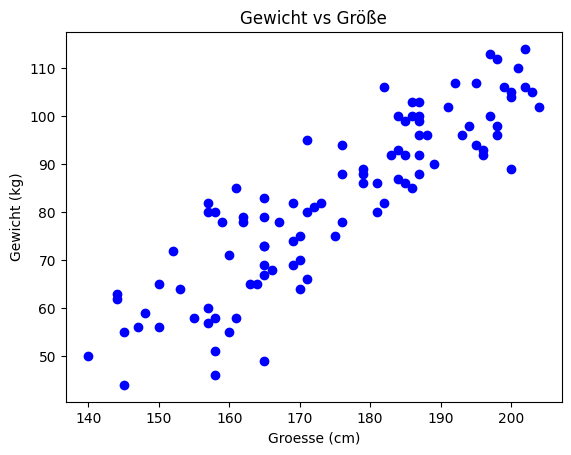

In [4]:
# Sample Data on a set of persons to determine a "typical" hight to weight function. 
# Real life hint: there is no function like that - only something we may consider normal, overweight and underweight


# SHOW DATA
x = data["Groesse"]
y = data["Gewicht"]

plt.scatter(x, y, color = 'blue')
plt.title('Gewicht vs Größe')
plt.xlabel('Groesse (cm)')
plt.ylabel('Gewicht (kg)')
plt.show()

In [5]:
# First glance analysis:  there might be a linear function behind this ... 
# Otherwise it does not make sense to look for a linear function with a learning algorithm, of course.

# getting some statistical data

x_mean = x.mean()
y_mean = y.mean()

x_max = x.max()
y_max = y.max()

x_min = x.min()
y_min = y.min()

print("Mean: (",x_mean,",",y_mean,") Max: (",x_max,",",y_max,") Min: (",x_min,",",y_min,")")

Mean: ( 175.12 , 82.31 ) Max: ( 204 , 114 ) Min: ( 140 , 44 )


In [6]:
# The first algorithm to learn: Gradient Decent on a Loss-Function (or Error-Funktion)

# Well known loss functions?

# MSE :  Mean Square Error     


def Cost(x,y,a,b):
    mse  = 0
    for i in range(x.size):
        err = y[i]-(a+b*x[i])
        mse = mse + err*err
    mse  = mse / x.size
    return mse

# guessed values for a and b from an estimated linear equation y = a + b*x 

a = -20  # y axis section
b = 0.7  # slope

mse = Cost(x,y,a,b)

print("MSE for y = ",a," + ",b," * x : ",mse)


MSE for y =  -20  +  0.7  * x :  492.0177999999999


In [7]:
# another loss function (maybe better?) is RMSE: Root Mean Square Error

# RMSE = SQRT(MSE)

rmse = math.sqrt(mse)

print("RMSE for y = ",a," + ",b," * x : ",rmse)


RMSE for y =  -20  +  0.7  * x :  22.181474252177196


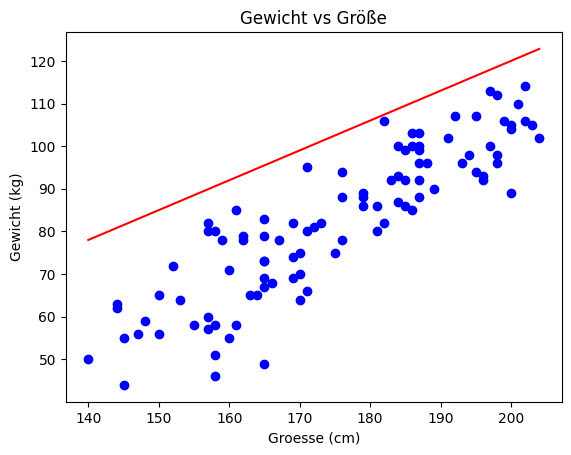

In [8]:
# obviously: when we look for the minimum error position, it is the same in both measures

# Let us visualize our guessed linear function

plt.scatter(x, y, color = 'blue')
plt.title('Gewicht vs Größe')
plt.xlabel('Groesse (cm)')
plt.ylabel('Gewicht (kg)')
plt.plot([x_min,x_max],[a+b*x_min,a+b*x_max],color='red')
plt.show()

In [9]:
# First glance analysis:  we should at least adapt the slope a bit to improve it ...

# How to use gradient decent in order to find the right parameters:

# Get the derivative of the error function (loss function) wrt. a and b 
# for simplicity, we take MSE

# This determines in which direction to correct the parameter
# Additionally, a small factor (learning_rate) is used to approach the target value

# a <- a - learning_rate * (a+b*x[i]-y[i])
# b <- b - learning_rate * (a+b*x[i]-y[i])*x[i]

# REGRESSION GRADIENT DECENT

learning_rate = 0.000001  # just a first guess

alpha = 0 # use alpha instead of a ... sounds more scientific
beta  = 0 # see above ... 

epochs = 10 # how many steps towards the target to take

for e in range(epochs):
    tmp_a = 0
    tmp_b = 0
    
    for i in range(x.size):
        tmp = alpha+beta*x[i]-y[i]
        tmp_a = tmp_a + tmp
    tmp_a = tmp_a / x.size

    for i in range(x.size):
        tmp = (alpha+beta*x[i]-y[i])*x[i]
        tmp_b = tmp_b + tmp
    tmp_b = tmp_b / x.size

    # alpha and beta need to be updated simultaneously
    
    alpha = alpha - learning_rate * tmp_a
    beta  = beta - learning_rate * tmp_b

# let's look at the result ...


mse = Cost(x,y,alpha,beta)

print("MSE for y = ",alpha," + ",beta," * x : ",mse)


MSE for y =  0.0007165046350185557  +  0.12790168609132854  * x :  3833.0894999310844


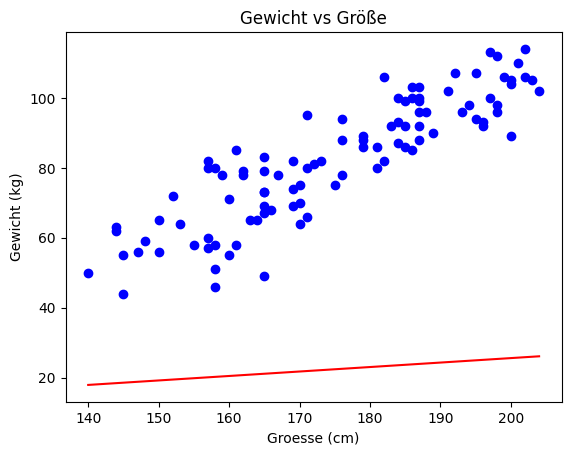

In [10]:
# Let us visualize our newly found linear function

plt.scatter(x, y, color = 'blue')
plt.title('Gewicht vs Größe')
plt.xlabel('Groesse (cm)')
plt.ylabel('Gewicht (kg)')
plt.plot([x_min,x_max],[alpha+beta*x_min,alpha+beta*x_max],color='red')
plt.show()

In [11]:
# Obviously, this is not (yet) good. How can we handle it? Take more iterations to approach a better result
# let us make it 200 instead of 10

# REGRESSION GRADIENT DECENT

learning_rate = 0.000001  # just a first guess

alpha = 0 # use alpha instead of a ... sounds more scientific
beta  = 0 # see above ... 

epochs = 200 # how many steps towards the target to take

for e in range(epochs):
    tmp_a = 0
    tmp_b = 0
    
    for i in range(x.size):
        tmp = alpha+beta*x[i]-y[i]
        tmp_a = tmp_a + tmp
    tmp_a = tmp_a / x.size

    for i in range(x.size):
        tmp = (alpha+beta*x[i]-y[i])*x[i]
        tmp_b = tmp_b + tmp
    tmp_b = tmp_b / x.size

    # alpha and beta need to be updated simultaneously
    
    alpha = alpha - learning_rate * tmp_a
    beta  = beta - learning_rate * tmp_b

# let's look at the result ...


mse = Cost(x,y,alpha,beta)

print("MSE for y = ",alpha," + ",beta," * x : ",mse)


MSE for y =  0.002534419198451761  +  0.4732056080784955  * x :  123.53138142691145


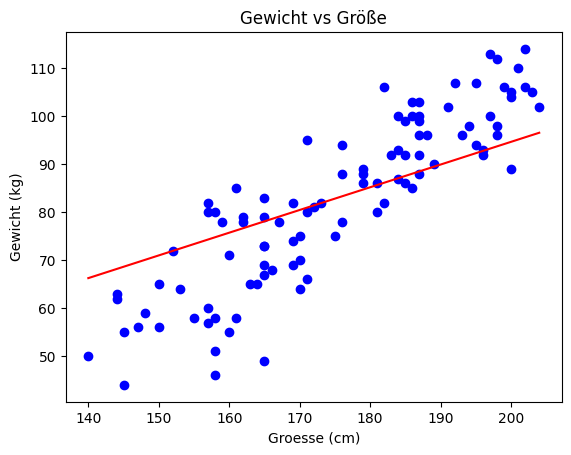

In [12]:
# Let us visualize our newly found linear function again

plt.scatter(x, y, color = 'blue')
plt.title('Gewicht vs Größe')
plt.xlabel('Groesse (cm)')
plt.ylabel('Gewicht (kg)')
plt.plot([x_min,x_max],[alpha+beta*x_min,alpha+beta*x_max],color='red')
plt.show()

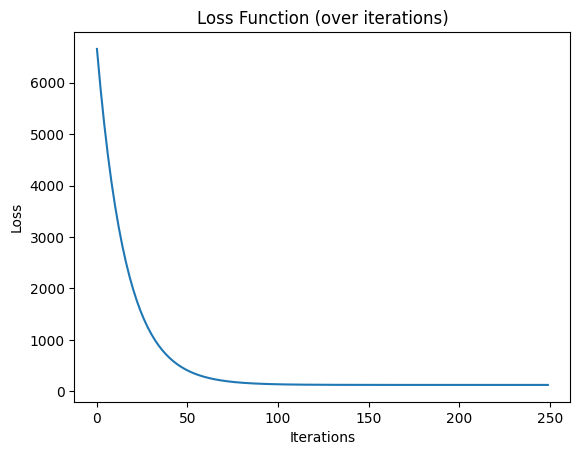

In [13]:
# Obviously, this is much better. So we might just give the algorithm some time and iterations to converge

# Interesting to see: how does the loss value develop over time?

# REGRESSION GRADIENT DECENT

learning_rate = 0.000001

alpha = 0
beta  = 0

epochs = 250

mse_line = []


for e in range(epochs):
    tmp_a = 0
    tmp_b = 0
    
    for i in range(x.size):
        tmp = alpha+beta*x[i]-y[i]
        tmp_a = tmp_a + tmp
    tmp_a = tmp_a / x.size

    for i in range(x.size):
        tmp = (alpha+beta*x[i]-y[i])*x[i]
        tmp_b = tmp_b + tmp
    tmp_b = tmp_b / x.size

    alpha = alpha - learning_rate * tmp_a
    beta  = beta - learning_rate * tmp_b

    mse  = 0

    for i in range(x.size):
        err = y[i]-(alpha+beta*x[i])
        mse = mse + err*err
    mse  = mse / x.size
    
    mse_line.append(mse)

plt.title('Loss Function (over iterations)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(np.array(mse_line))
plt.show()   

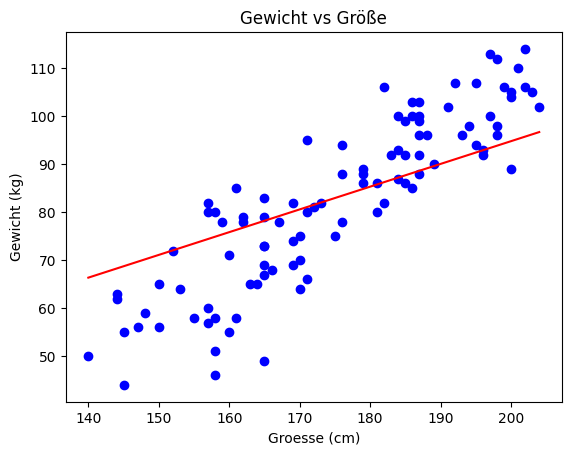

In [14]:
# What can we see? We probably do not need more than 100 iterations for the same result, right?
# It looks like it has converged already ... so is this the best we can get?

# Let us visualize our newly found linear function again

plt.scatter(x, y, color = 'blue')
plt.title('Gewicht vs Größe')
plt.xlabel('Groesse (cm)')
plt.ylabel('Gewicht (kg)')
plt.plot([x_min,x_max],[alpha+beta*x_min,alpha+beta*x_max],color='red')
plt.show()

MSE for y =  -50  +  0.75  * x :  76.55125


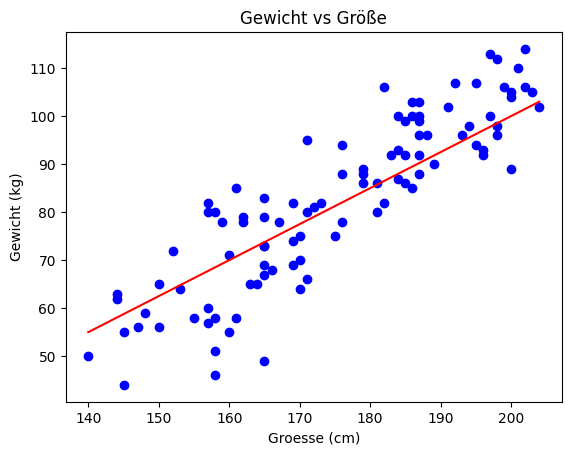

In [15]:
# wild guess: by lowering a and increasing b, we could do better.

# Here's an "educated guess" based upon a and b as computed before

alpha = -50
beta  = 0.75

mse = Cost(x,y,alpha,beta)

print("MSE for y = ",alpha," + ",beta," * x : ",mse)

plt.scatter(x, y, color = 'blue')
plt.title('Gewicht vs Größe')
plt.xlabel('Groesse (cm)')
plt.ylabel('Gewicht (kg)')
plt.plot([x_min,x_max],[alpha+beta*x_min,alpha+beta*x_max],color='red')
plt.show()

In [16]:
# Well, it has a lower loss, so why does it take so long to get there?

# Maybe a local minimum issue?  If so, just continue from here to see if it gets better ...

# REGRESSION GRADIENT DECENT

learning_rate = 0.000001  # just a first guess

# alpha and beta as we guessed it before 

epochs = 200 # how many steps towards the target to take

for e in range(epochs):
    tmp_a = 0
    tmp_b = 0
    
    for i in range(x.size):
        tmp = alpha+beta*x[i]-y[i]
        tmp_a = tmp_a + tmp
    tmp_a = tmp_a / x.size

    for i in range(x.size):
        tmp = (alpha+beta*x[i]-y[i])*x[i]
        tmp_b = tmp_b + tmp
    tmp_b = tmp_b / x.size

    # alpha and beta need to be updated simultaneously
    
    alpha = alpha - learning_rate * tmp_a
    beta  = beta - learning_rate * tmp_b

# let's look at the result ...


mse = Cost(x,y,alpha,beta)

print("MSE for y = ",alpha," + ",beta," * x : ",mse)


MSE for y =  -50.00001145959621  +  0.756981004446227  * x :  75.03722768176884


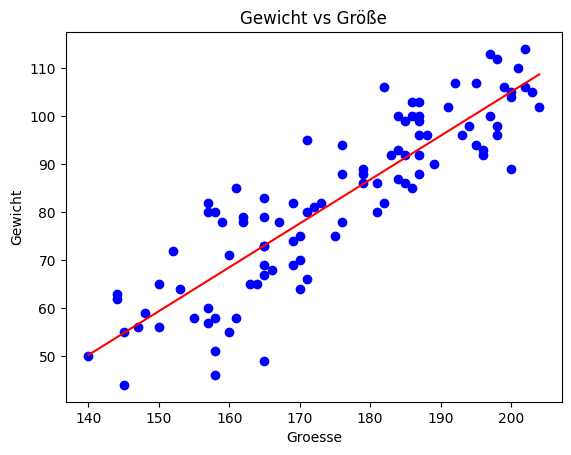

Alpha =  -77.70862765876706  Beta =  0.9137655759408808


In [17]:
# It improves again ... but slowly. How do we know it is done? When do we stop? 
# These are substancial questions of machine learning 

# In this special case of linear regression, we may take another way. 
# Do you remember statistics lectures you may have had?

# There is a function which just computes the optimum. No gradient decent and iterations needed ...

# REGRESSION  y = a + b * x

b = 0

for i in range(x.size):
    b = b + (x[i]-x_mean)*(y[i]-y_mean)
   
denom_b = 0

for i in range(x.size):
    denom_b = denom_b + (x[i]-x_mean)*(x[i]-x_mean)
    
b = b / denom_b

a = y_mean - b*x_mean

plt.scatter(x, y, color='blue')
plt.title('Gewicht vs Größe')
plt.xlabel('Groesse')
plt.ylabel('Gewicht')
plt.plot([x_min,x_max],[a+b*x_min,a+b*x_max],color='red')


plt.show()

print ("Alpha = ", a," Beta = ", b)


In [18]:
# Just to check - here ist the loss 

mse = Cost(x,y,a,b)

print("MSE for y = ",a," + ",b," * x : ",mse)


MSE for y =  -77.70862765876706  +  0.9137655759408808  * x :  67.97746577720184


In [19]:
# Why do we use gradient decent anyway if it is so easy?

# For this sample application, the answer is easy: do not use gradient decent 
# In general, it is more complicated.

# Imagine it is a linear function with not only 2 parameters (alpha, beta) but 100 or 1000 or more.
# Now the computational complexity of inverting the parameter matrices leads to disadvantages.
# Plus, the functional approach requires the data to fit in the main memory


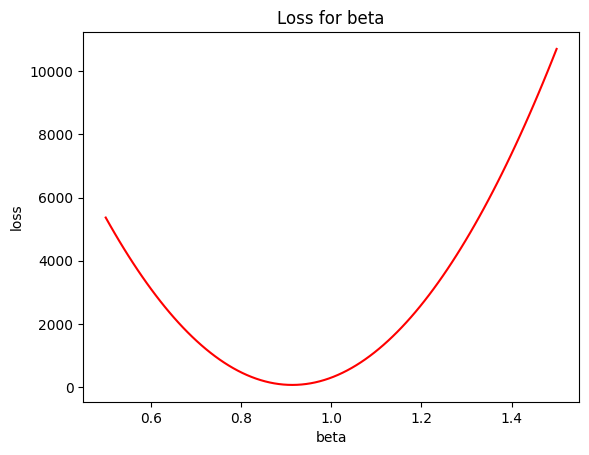

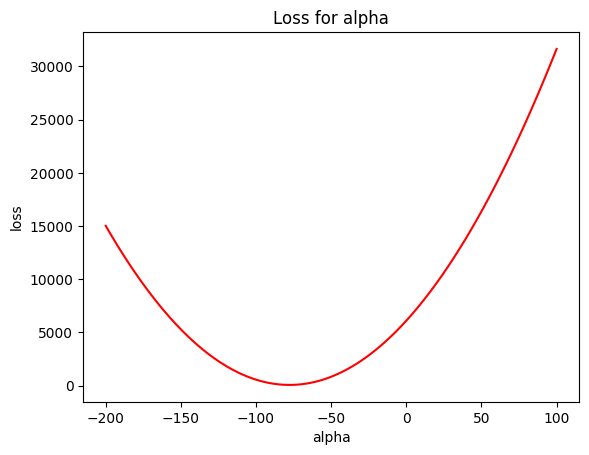

In [20]:
# Ok - first steps to linear regression and learning done.

# Some irritation? Use a learning rate which is (much) larger than 0.000001

# what happens?

# Just as a hint to understanding: 

# ERROR CURVE

# a is kept on the optimal value

base = np.linspace(0.5,1.5,100)
value = [Cost(x,y,a,z) for z in base]
plt.title('Loss for beta')
plt.xlabel('beta')
plt.ylabel('loss')
plt.plot(base,value ,color='red')
plt.show()

# b is kept on the optimal value

base = np.linspace(-200,100,100)
value = [Cost(x,y,z,b) for z in base]
plt.title('Loss for alpha')
plt.xlabel('alpha')
plt.ylabel('loss')
plt.plot(base,value ,color='red')
plt.show()


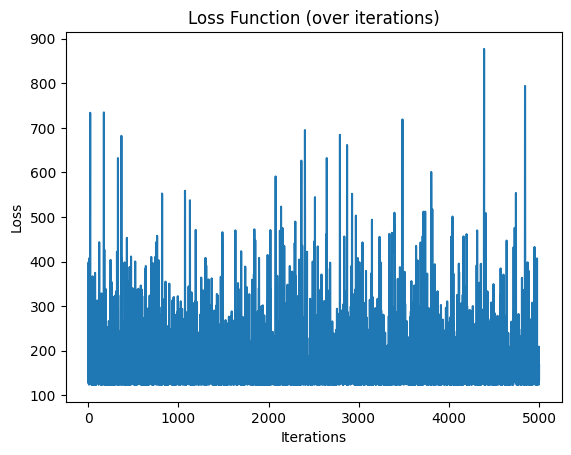

In [21]:
# The regression algorithm we used is batch gradient decent. 

# There is another approach which does not use the complete dataset in each step.

# Stochastic Gradient Decent

learning_rate = 0.00002  # just another experiment ...

alpha = 0
beta  = 0

runs = 5000  # faster - more iterations possible

mse_line = []


for e in range(runs):
    
    tmp_a = 0
    tmp_b = 0
    
    i = random.randint(0,99)
    tmp_a = alpha+beta*x[i]-y[i]
    tmp_b = (alpha+beta*x[i]-y[i])*x[i]
    
    alpha = alpha - learning_rate * tmp_a
    beta  = beta - learning_rate * tmp_b

    mse  = 0

    for i in range(x.size):
        err = y[i]-(alpha+beta*x[i])
        mse = mse + err*err
    mse  = mse / x.size
    
    mse_line.append(mse)
    
plt.title('Loss Function (over iterations)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(np.array(mse_line))
plt.show()   

MSE for y =  -0.07013916260167076  +  0.5125895405019217  * x :  168.31396871384592


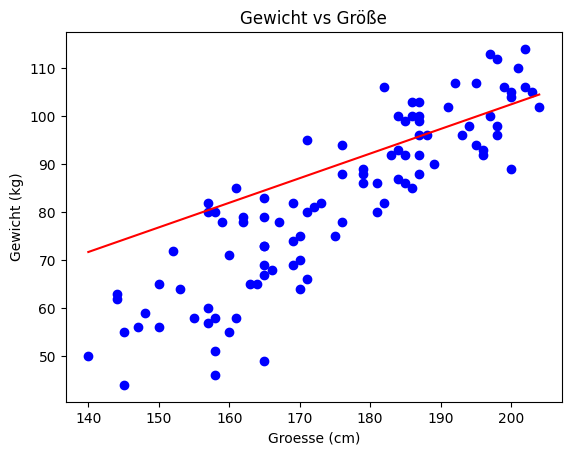

In [22]:

mse = Cost(x,y,alpha,beta)

print("MSE for y = ",alpha," + ",beta," * x : ",mse)

plt.scatter(x, y, color = 'blue')
plt.title('Gewicht vs Größe')
plt.xlabel('Groesse (cm)')
plt.ylabel('Gewicht (kg)')
plt.plot([x_min,x_max],[alpha+beta*x_min,alpha+beta*x_max],color='red')
plt.show()

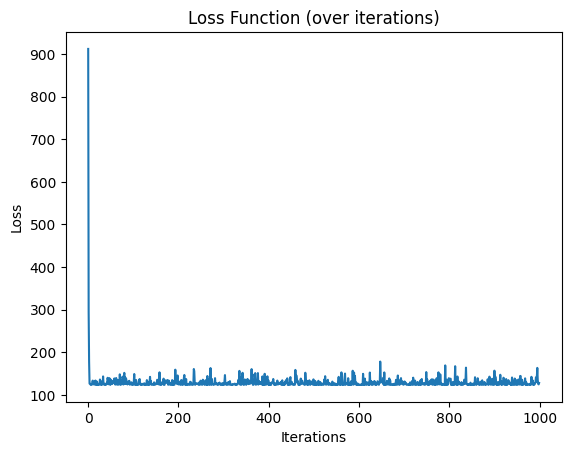

In [23]:
# As you see, the loss function is not as "constant" as before.

# There is another approach, which is a combination of these two:

# Mini-Batch Gradient Decent


# REGRESSION GRADIENT DECENT

learning_rate = 0.00002

alpha = 0
beta  = 0

batchsize = 10
epochs = 1000

mse_line = []


for e in range(epochs):
    tmp_a = 0
    tmp_b = 0
    
    minibatch = [random.randint(0, 99) for z in range(0, batchsize)]
   
    for i in minibatch:
        tmp = alpha+beta*x[i]-y[i]
        tmp_a = tmp_a + tmp
    tmp_a = tmp_a / batchsize

    for i in minibatch:
        tmp = (alpha+beta*x[i]-y[i])*x[i]
        tmp_b = tmp_b + tmp
    tmp_b = tmp_b / batchsize

    alpha = alpha - learning_rate * tmp_a
    beta  = beta - learning_rate * tmp_b

    mse  = 0

    for i in range(x.size):
        err = y[i]-(alpha+beta*x[i])
        mse = mse + err*err
    mse  = mse / x.size
    
    mse_line.append(mse)

plt.title('Loss Function (over iterations)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(np.array(mse_line))
plt.show()   



MSE for y =  -0.011409750765376914  +  0.4864693543280957  * x :  128.1730981466523


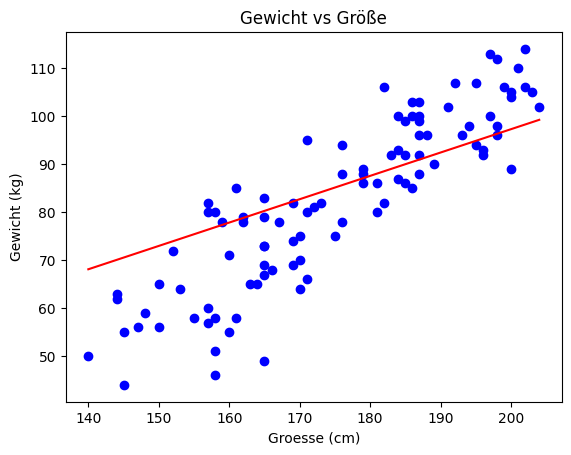

In [24]:

mse = Cost(x,y,alpha,beta)

print("MSE for y = ",alpha," + ",beta," * x : ",mse)

plt.scatter(x, y, color = 'blue')
plt.title('Gewicht vs Größe')
plt.xlabel('Groesse (cm)')
plt.ylabel('Gewicht (kg)')
plt.plot([x_min,x_max],[alpha+beta*x_min,alpha+beta*x_max],color='red')
plt.show()